# Premier League Club Investment Analysis for an Investment company (EDA)

Context:

A renowned investment firm usually invest in top-tier sports teams that have potential. The dataset in their possession comprises crucial information about all the clubs that have participated in premier league (assume that it has the data for all clubs). It includes data on the number of goals scored, the number of times they have finished in the top two positions and other relevant details.

Data: Premier League Final Data.csv- : The data set contains information on all the clubs so far participated in all the premier league tournaments.

Data Dictionary:

Club: Name of the football club Matches: Number of matches the club has played in the Premier League Wins: Number of matches won by the club in the Premier League Loss: Number of matches lost by the club in the Premier League Draws: Number of matches drawn by the club in the Premier League Clean Sheets: Number of matches in which the club has prevented the opposing side from scoring Team Launch: Year in which the club was founded Winners: Number of times the club has won the Premier League Runners-up: Number of times the club has finished as runners-up in the Premier League lastplayed_pl: Year in which the team last played in the Premier League Project Objective

The management of the firm aims to invest in one of the top-performing club in the English Premier League. To aid in their decision-making process, the analytics department has been tasked with creating a comprehensive report on the performance of various clubs. However, some of the more established clubs have already been owned by the competitors. As a result, the firm wishes to identify the clubs they can approach and potentially invest to ensure a successful and profitable deal.

In [54]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("club.csv")

In [3]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


In [4]:
df.isnull().sum()

Club               0
Matches Played     0
Win                0
Loss               0
Drawn              0
Goals              0
Clean Sheets       0
TeamLaunch         0
Winners           15
Runners-up        18
lastplayed_pl      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      22 non-null     object 
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 3.6+ KB


# data cleaning

In [6]:
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12
5,6Bournemouth,219,64,107,48,269,45,1899,0.0,0,Apr-23
6,7Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,-,Apr-23
7,8Burnley,304,83,145,76,300,78,1882,0.0,-,Apr-22
8,9Charlton Athletic,304,93,129,82,342,91,1905,0.0,NaN,May-07
9,10Chelsea,1182,628,261,293,2002,473,1905,5.0,4,Apr-23


In [7]:
df['Club']=df['Club'].str.replace('\d+'," ")

C:\Users\91966\AppData\Local\Temp\ipykernel_52084\1267817007.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Club']=df['Club'].str.replace('\d+'," ")


In [8]:
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,Apr-23
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,-,Apr-23
7,Burnley,304,83,145,76,300,78,1882,0.0,-,Apr-22
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,NaN,May-07
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,Apr-23


calculating the runners column in order replace it with zero if the number of tournaments happened is equal to the data mentioned manually as the sum function cannot be performed.Data is from 2000

In [9]:
6+1+1+4+5+3+7+2+1


30

In [10]:
#As the data is equal to number of tournaments happened we are proceeding to replace the nan with o 

In [11]:
df['Runners-up']=df['Runners-up'].fillna(0)

In [12]:
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,Apr-23
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,-,Apr-23
7,Burnley,304,83,145,76,300,78,1882,0.0,-,Apr-22
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,May-07
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,Apr-23


In [13]:
df['Runners-up']=df['Runners-up'].replace('-',0)

In [14]:
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,Apr-23
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,Apr-23
7,Burnley,304,83,145,76,300,78,1882,0.0,0,Apr-22
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,May-07
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,Apr-23


In [15]:
3+1+5+1+1+6+13

30

In [16]:
df['Winners']=df['Winners'].fillna(0)

In [17]:
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,Apr-23
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,Apr-23
7,Burnley,304,83,145,76,300,78,1882,0.0,0,Apr-22
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,May-07
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,Apr-23


In [18]:
df['TeamLaunch'] = pd.to_datetime(df['TeamLaunch'], errors='coerce')
df['TeamLaunch'] = df['TeamLaunch'].dt.strftime('%Y')

In [19]:
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,Apr-23
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,Apr-23
7,Burnley,304,83,145,76,300,78,1882,0.0,0,Apr-22
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,May-07
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,Apr-23


In [20]:
df['lastplayed_pl'] = (pd.to_datetime(df['lastplayed_pl'], format='%b-%y', errors='coerce')).dt.year

In [21]:
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,2023
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,2023
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023
7,Burnley,304,83,145,76,300,78,1882,0.0,0,2022
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,2023


In [22]:
df['Runners-up']=pd.to_numeric(df['Runners-up'],errors='coerce')
df['Runners-up'] = df['Runners-up'].astype('Int64')

In [23]:
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,2023
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,2023
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023
7,Burnley,304,83,145,76,300,78,1882,0.0,0,2022
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,2023


# Exploratory data analysis -To find the suggestion 

In [24]:
df.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up,lastplayed_pl
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,573.750000,215.450000,210.425000,147.875000,769.000000,167.925000,0.750000,0.750000,2018.000000
std,358.986519,194.164608,102.132364,88.873632,627.746478,135.561584,2.372384,1.750458,6.876195
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.000000,2000.000000
25%,275.000000,80.500000,127.500000,71.500000,304.500000,66.000000,0.000000,0.000000,2014.500000
50%,443.000000,116.500000,193.500000,120.000000,462.000000,104.000000,0.000000,0.000000,2022.000000
75%,934.750000,295.750000,263.000000,222.000000,1142.750000,244.250000,0.000000,0.000000,2023.000000
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.000000,2023.000000


In [25]:
df[df['Winners']==13]['Club']

20     Manchester United
Name: Club, dtype: object

In [26]:
df[df['Runners-up']==7]['Club'] 

20     Manchester United
Name: Club, dtype: object

We can observe that machester united club has won 20 times and 7 times as runnerup

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Histogram of Matches Played')

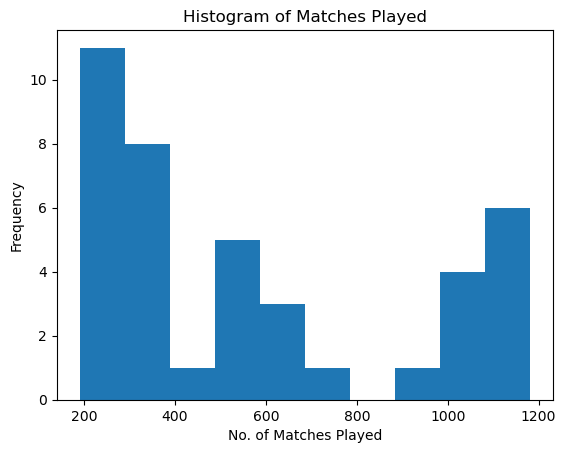

In [28]:
plt.hist(df['Matches Played'])
plt.xlabel('No. of Matches Played')
plt.ylabel('Frequency')
plt.title('Histogram of Matches Played')

We can see from the histogram that a majority of teams have played less than 400 matches. However, there are a few teams that have played an exceptionally high number of matches, exceeding 900.

As per the project requirements, it is worth noting that some of the more established clubs have already been owned by the competitors. Therefore, the client is interested in identifying potential clubs that may perform well in the future, even if they have less experience in the Premier League.

In [29]:
df[df['Matches Played']>=900]['Club']

0                Arsenal
1            Aston Villa
9                Chelsea
13               Everton
18             Liverpool
19       Manchester City
20     Manchester United
22      Newcastle United
29           Southampton
33     Tottenham Hotspur
36       West Ham United
Name: Club, dtype: object

Upon analysis, we have observed that there are a total of 11 clubs who have significantly more experience in the Premier League as compared to the others. These clubs have played a higher number of matches and have established themselves as experienced players in the league.

As per the client's requirements, we are interested in identifying potential clubs that may perform well in the future, even if they have less experience in the Premier League. Therefore, we have decided to drop these 11 clubs from our analysis, as their established presence in the league may skew our results and make it difficult to identify less experienced clubs with high potential.

By removing these clubs, we can focus our analysis on the remaining clubs and potentially identify hidden gems that may have been overlooked due to their lack of experience in the league.

In [30]:
df[df['Matches Played'] < 900]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023
7,Burnley,304,83,145,76,300,78,1882,0.0,0,2022
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007
10,Coventry City,354,99,143,112,387,92,1883,0.0,0,2001
11,Crystal Palace,532,153,241,138,576,133,1861,0.0,0,2023
12,Derby County,266,68,128,70,271,66,1884,0.0,0,2008


In [31]:
df = df[df['Matches Played'] < 900].reset_index(drop=True)

It is essential to understand that the values in all the columns represent the cumulative scores over all the matches played.

To accurately analyze the performance of the teams, we must normalize the data by dividing the no. of wins, loss, drawn, clean sheet, goals by the number of matches played.

This normalization will provide us with a fair idea of the winning, losing, draw, and clean sheet percentages of each team along with goals per match.

In [32]:
df['Winning Rate'] = (df['Win'] / df['Matches Played'])*100
df['Loss Rate'] = (df['Loss'] / df['Matches Played'])*100
df['Drawn Rate'] = (df['Drawn'] / df['Matches Played'])*100
df['Clean Sheet Rate'] = (df['Clean Sheets'] / df['Matches Played'])*100

In [33]:
df['Avg Goals Per Match']=df['Goals']/df['Matches Played']
df['Avg Goals Per Match']=df['Avg Goals Per Match'].round()

In [34]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


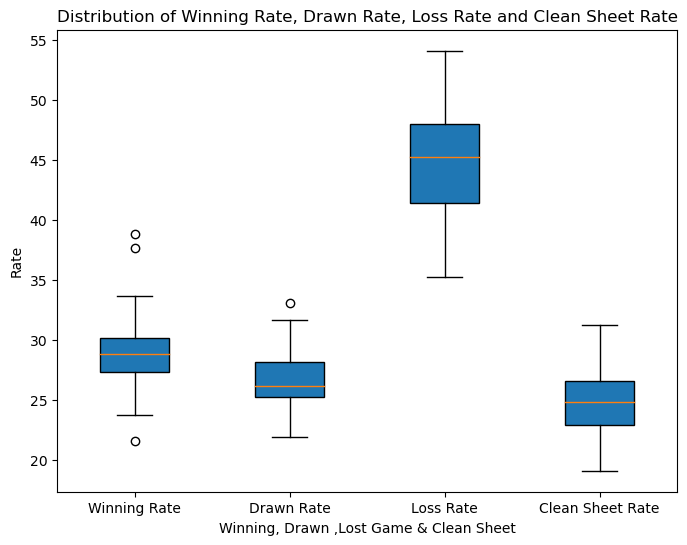

In [35]:
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot([df['Winning Rate'], df['Drawn Rate'], df['Loss Rate'], df['Clean Sheet Rate']], 
                      patch_artist=True,
                      labels=['Winning Rate', 'Drawn Rate', 'Loss Rate', 'Clean Sheet Rate'])
plt.title('Distribution of Winning Rate, Drawn Rate, Loss Rate and Clean Sheet Rate')
plt.xlabel('Winning, Drawn ,Lost Game & Clean Sheet')
plt.ylabel('Rate')
plt.show()

Winning Rate
We observe that there are a few outliers in the Winning Rate boxplot, which are located above the upper whisker. It is safe to conclude that these outlier clubs have shown exceptional winning rates compared to the other clubs. Let us identify them ahead.

Also let us identify the club that has least "Winning Rate"

Drawn Rate
We observe an outlier in the drawn rate boxplot, indicating that there is one clubs has a much higher drawn rate compared to others. This may not necessarily be a positive indication, as it suggests that the club may struggle to secure wins in their matches. Going further let us identify which club is this.

Loss Rate
We can see very clearly that loss rates for these clubs are high compared to winning rate.

Clean Sheet Rate
We see that data for Clean Sheet rate is pretty symmetric.

In [36]:
Q1 = df['Winning Rate'].quantile(0.25)
Q3 = df['Winning Rate'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
highwinningrate = df[(df['Winning Rate'] > upper_bound)]
highwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0


In [37]:
lower_bound = Q1 - 1.5 * IQR
lowwinningrate = df[(df['Winning Rate'] < lower_bound)]
lowwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
17,Hull City,190,41,101,48,181,58,1904,0.0,0,2017,21.578947,53.157895,25.263158,30.526316,1.0


In [38]:
Q1 = df['Drawn Rate'].quantile(0.25)
Q3 = df['Drawn Rate'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
highwinningrate = df[(df['Drawn Rate'] > upper_bound)]
highwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


In [39]:
df['Avg Goals Per Match'].describe()

count    29.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Avg Goals Per Match, dtype: float64

In [40]:
df['Winners'].value_counts()

0.0    27
1.0     2
Name: Winners, dtype: int64

In [41]:
df['Runners-up'].value_counts()

0    28
1     1
Name: Runners-up, dtype: Int64

We observe that out of the 29 clubs, only 2 clubs have won the Premier League, and one club has been a runner-up. Let us identify these clubs

In [42]:
df[(df['Winners']==1) | (df['Runners-up']==1)]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0


Blackburn Rovers have won Premier League once and been an Runners-up once and Leicester City has won Premier League once.

In [43]:
df['Matches Played'].describe()

count     29.000000
mean     372.482759
std      153.533296
min      190.000000
25%      266.000000
50%      305.000000
75%      494.000000
max      696.000000
Name: Matches Played, dtype: float64

In [44]:
df['lastplayed_pl'].value_counts()

2023    8
2022    3
2017    3
2018    3
2012    2
2011    1
2007    1
2001    1
2008    1
2002    1
2015    1
2021    1
2000    1
2013    1
2010    1
Name: lastplayed_pl, dtype: int64

Out of the total 29 teams, eight are currently playing in the Premier League. Since these teams are currently active in the league, it makes sense to prioritize them in our analysis. However, there are also teams that date back as early as 2000. It may be appropriate to assign these teams less weight.

In [45]:
df[df['lastplayed_pl']==2023]['Club']

3                  Bournemouth
4       Brighton & Hove Albion
8               Crystal Palace
10                      Fulham
12                Leeds United
13              Leicester City
16           Nottingham Forest
27     Wolverhampton Wanderers
Name: Club, dtype: object

Giving more priority to teams that have more recent experience playing in the Premier League is ideal. When making the final decision, we will assign higher weight to teams that have played more recently, and lesser weight to those that have not played recently.

Section D: Final Recommendations Framework
Lets create a plan to Score each team on the pre defined metric.

Let's create a plan to Score each team on the pre defined metric.

* Give a score of 10 if club have a relatively high experience in the Premier League above average (372)
* Give a score of 15 if club has winning rate above Q3
* Give a score of 15 if club has lossing rate below Q1
* Give a score of 10 if club drawn rate below Q1 and losing rate is below Q1
* Give a score of 10 if club has clean sheet above Q3 and winning rate is above Q3
* Give a score of 15 if club has won premier league
* Give a score of 10 if club has been a runners-up in premier league
* Give a score of 15 if club has been currently playing in premier league

In [46]:
upper_bound_WinningRate = df['Winning Rate'].quantile(0.75)
lower_bound_LosingRate = df['Loss Rate'].quantile(0.25)
lower_bound_DrawnRate = df['Drawn Rate'].quantile(0.25)
upper_bound_CleanSheetRate = df['Clean Sheet Rate'].quantile(0.75)

In [47]:
len(df)

29

In [48]:
df['scores']=np.zeros(len(df))

In [49]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,0.0


In [50]:
df.loc[df['Matches Played'] >= 372, 'scores'] += 10
df.loc[df['Winning Rate'] >= upper_bound_WinningRate, 'scores'] += 15
df.loc[df['Loss Rate'] <= lower_bound_LosingRate, 'scores'] += 15
df.loc[(df['Drawn Rate'] <= lower_bound_DrawnRate) & (df['Loss Rate'] <= lower_bound_LosingRate), 'scores'] += 10
df.loc[(df['Clean Sheet Rate'] >= upper_bound_CleanSheetRate) & (df['Winning Rate'] >= upper_bound_WinningRate), 'scores'] += 10
df.loc[df['Winners'] == 1, 'scores'] += 15
df.loc[df['Runners-up'] == 1, 'scores'] += 10
df.loc[df['lastplayed_pl'] == 2023, 'scores'] += 15

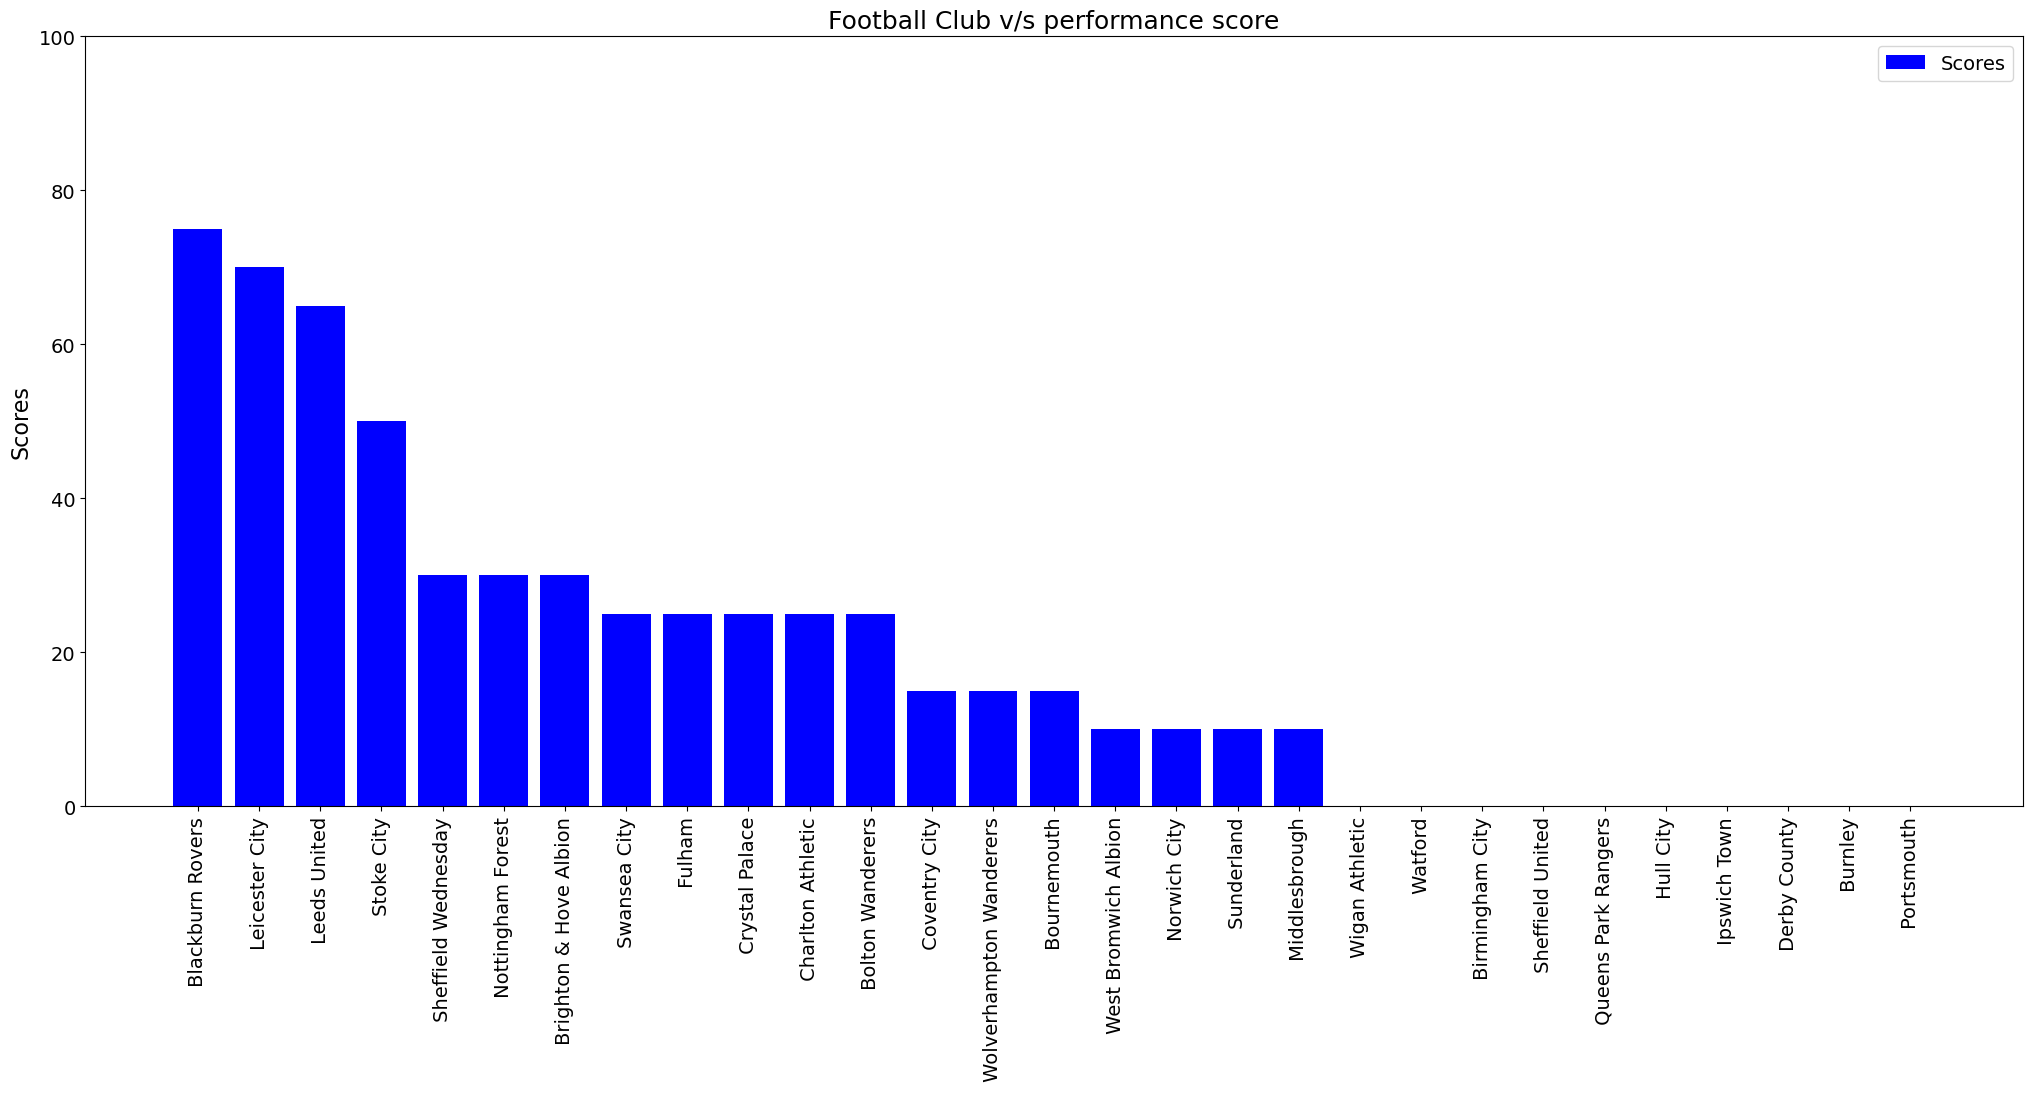

In [51]:
# sort the DataFrame by score in descending order
df_sort = df.sort_values(by='scores', ascending=False)

# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='blue')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

Based on the above chart, Blackburn Rovers has the highest score basis our analysis and next best Leicester City

To ensure a thorough evaluation of football club performance we must consider clubs current form.

Let us check the score of those clubs that have played in the last three years. Specifically, suggest including clubs that have played in 2023, as well as those that last played in 2022 and 2021.

This approach allows us to pinpoint those clubs that are currently in good form and have consistently performed well over the past few years.

In [52]:
selected_row = df.iloc[1]
selected_row

Club                    Blackburn Rovers
Matches Played                       696
Win                                  262
Loss                                 250
Drawn                                184
Goals                                927
Clean Sheets                         210
TeamLaunch                          1875
Winners                              1.0
Runners-up                             1
lastplayed_pl                       2012
Winning Rate                   37.643678
Loss Rate                       35.91954
Drawn Rate                     26.436782
Clean Sheet Rate               30.172414
Avg Goals Per Match                  1.0
scores                              75.0
Name: 1, dtype: object

Blackburn Rovers last played in the tournament in 2012, which was quite some time ago. Given this information, we recommend that stakeholders consider investing in Leicester City instead. We believe that Leicester City's recent form and performance make them a better choice for investment.
According to our research, Blackburn Rovers were relegated to the Championship league in 2012 i.e., league below Premier League and later to League One in 2017 i.e., league below Championship league. However, they were promoted back to the Championship in 2018 and have since finished in the middle of the table in recent years. Given their inconsistent performance and lack of presence in the Premier League since 2012, it would be inappropriate to recommend this club for investment.

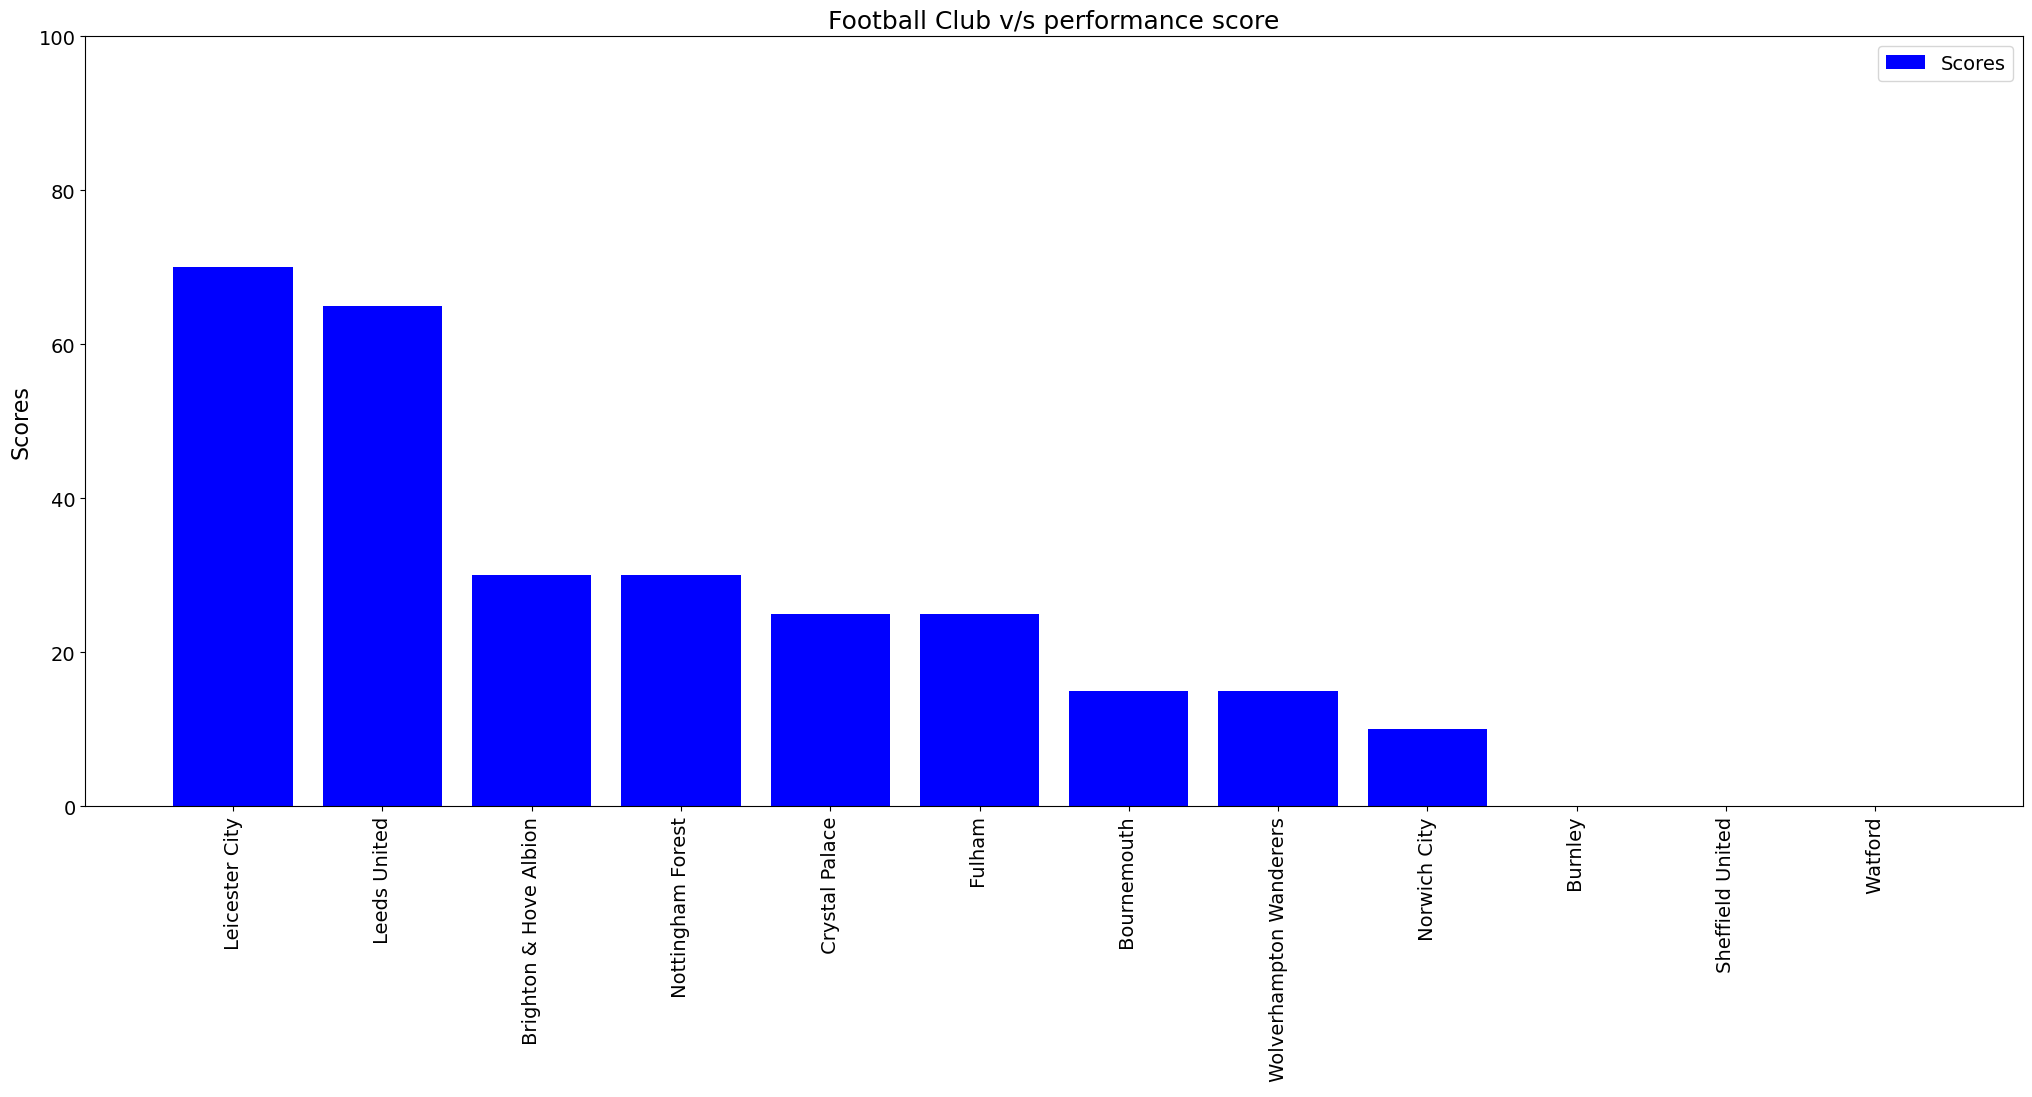

In [53]:
# sort the DataFrame by score in descending order
df_sort = df[(df['lastplayed_pl']==2023) | (df['lastplayed_pl']==2022) | (df['lastplayed_pl']==2021)].sort_values(by='scores', ascending=False)

# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='blue')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

To support our claim, we will conduct further secondary research to provide additional evidence of Leicester City's current form and potential for success.
On the other hand, Leicester City, the 2016 Premier League champions, have consistently finished in the top 10 in recent years. They placed 5th in both the 2019-2020 and 2020-2021 seasons and finished 8th in 2021-2022. Leicester City has the potential to achieve even greater success in the near future. Therefore, it would be reasonable to recommend "Leicester City" to our clients.

Source 1: https://www.transfermarkt.co.in/blackburn-rovers/platzierungen/verein/164

Source 2: https://www.transfermarkt.co.in/leicester-city/platzierungen/verein/1003

# We recommend investing in Leicester City based on our analysis